[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/decision_trees_and_random_forests/Decision%20Trees%20and%20Random%20Forest.ipynb)

# Decision Trees
## What is a decsion tree?
A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continuous value).
## How do decision trees work?

<img src="decision_tree.jpg" height=400 width=400>

## CART - Classification and Regression Trees
These algorithms enable us to predict either discrete values(calssification) or real valued outputs(regression). We iteratively ask particular questions, all the while splitting our data and eventually reaching a leaf node and coming to our final decision. <br><br>
**But now the question arises. How do we choose the points at which to split the data?**<br><br>
There are 2 main ways of doing this. These are the **Gini index and Entropy** & **Information Gain** mteric. So let's delve a little deeper into these.

## Gini Impurity
Now as stated before, we want to find the idea values for which the data splits and we can go further down the decision tree. 
\begin{equation*}
I_G(P) = 1 - \sum_{i = 1}^Jp_i^2
\end{equation*}

Here, p<sub>i</sub> is the proportion of observations with target variable value i.<br><br>
A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. This metric is more useful for classification problems as we can work on discrete vlues or levels. 

## Entropy & Information Gain
Information Gain as a metric is more useful for regression problems as it helps us get more accurate continuous real valued outputs.
### Entropy
Entropy is the measure of purity or disorder.
\begin{equation*}
H(x) = -\sum_{i = 1}^n p(x_i) log_2p(x_i)
\end{equation*}
For example, let us assume we have 2 classes, pos and neg and maybe 10 data points. We have 4 values as pos and 6 values as neg.<br><br>
Calculating entropy would be<br>
\begin{equation*}
-\frac{4}{10} \times log_2\bigg(\frac{4}{10}\bigg) - \frac{6}{10} \times log_2\bigg(\frac{6}{10}\bigg) \approx 0.97
\end{equation*}
Here, a high value of entropy means that the disroder is pretty large. Note that the value can exceed 1.
### Information Gain
\begin{equation*}
IG(Y, X) = H(Y) - H(Y|X)
\end{equation*}
In simple terms, this is the information gained after splitting the dataset on the given feature X. The difference of entropies before and after the split are calculated and that is used to determine **how much information is gained** from that split.<br><br>
So the split with the highest Information Gain will be considered as the first split and so on.    

# Random Forests
Now that we have an understanding of decision trees, we can get into the nitty gritty of a random forest. <br>
The easiest explanation is that a random forest is a combination of several decision trees. It is quite literraly a **random forest** of trees!<br><br>
The main issue with decision trees lies in the fact that decision trees are prone to overfitting on the data we provide to it. Even after using techniques like pruning to remove certain branches in a tree, we find that it may still gemeralize for a dataset and not give accurate results for real world examples. <br><br>
To combat this, random forests were brought about. We perform a majority vote on several decision trees and hence get a value.
<img src="random_forest_model.png" height=600 width=600>

<br><br>
And that's pretty much it. We will be implementing a Random FOrest classifier using ```scikit-learn``` as we have an intuition about whats going on behind the scenes. Let's jump into the code!

Import the necessary libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/akshayrb22/playing-with-data/master/supervised_learning/decision_trees_and_random_forests/data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
features = df.columns
features

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
y, labels = pd.factorize(df['diagnosis'])
print(y)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
df = df.drop(['diagnosis'], axis=1)
df.dropna(axis=1, inplace=True)

In [7]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [8]:
X = df

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

/home/akshayrb22/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
clf.predict_proba(X_test)

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [0.7, 0.3],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.3, 0.7],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.3,

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

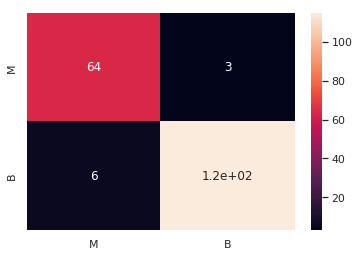

In [15]:
import seaborn as sns
sns.set()
df_cm = pd.DataFrame(cm, index=['M', 'B'], columns=['M', 'B'])
sns.heatmap(df_cm, annot=True)